In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
dataset = dataset.set_index('CustomerID')

In [4]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
scaler = StandardScaler()

In [7]:
categorical_cols = ['Gender']
numeric_cols = ['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']
dataset[categorical_cols] = encoder.fit_transform(dataset[categorical_cols])
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

In [8]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1.128152,-1.424569,-1.738999,-0.434801
2,1.128152,-1.281035,-1.738999,1.195704
3,-0.886405,-1.352802,-1.700830,-1.715913
4,-0.886405,-1.137502,-1.700830,1.040418
5,-0.886405,-0.563369,-1.662660,-0.395980


In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
bic = []
for i in range(1, 10):
    gm = GaussianMixture(n_components = i, covariance_type='full', tol=1e-3,
                         max_iter=100,n_init=10, init_params='k-means++', random_state=42)
    gm.fit(dataset)
    bic.append([i,gm.bic(dataset)])
bic = np.array(bic)

In [11]:
bic

array([[ 1.00000000e+00,  2.32005404e+03],
       [ 2.00000000e+00, -2.99302088e+02],
       [ 3.00000000e+00, -2.91992308e+02],
       [ 4.00000000e+00, -2.78539768e+02],
       [ 5.00000000e+00, -2.65110697e+02],
       [ 6.00000000e+00, -2.30520825e+02],
       [ 7.00000000e+00, -1.89874281e+02],
       [ 8.00000000e+00, -1.81577178e+02],
       [ 9.00000000e+00, -1.26319279e+02]])

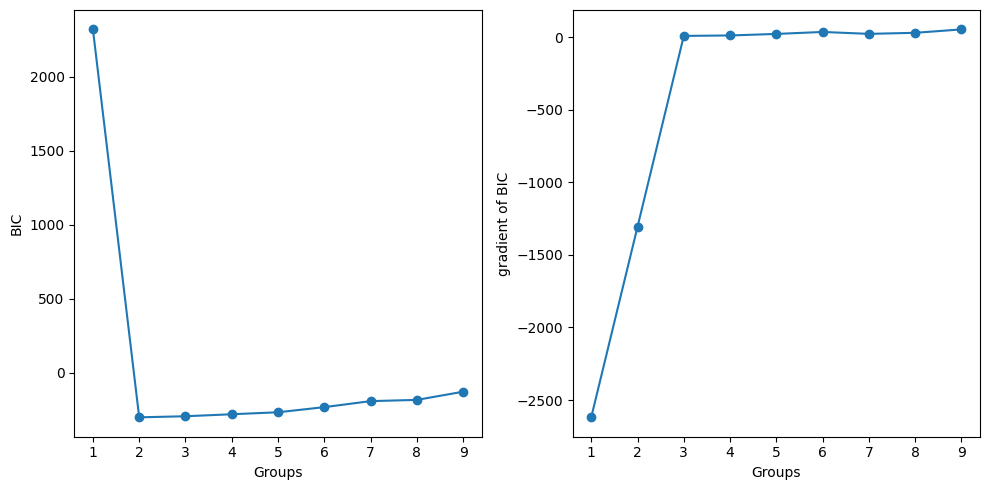

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(bic[:,0], bic[:,1], marker='o')
ax[0].set_xlabel("Groups")
ax[0].set_ylabel("BIC")
ax[1].plot(bic[:,0], np.gradient(bic[:,1]), marker='o')
ax[1].set_xlabel("Groups")
ax[1].set_ylabel("gradient of BIC")
plt.tight_layout()
plt.show()

In [13]:
gm = GaussianMixture(n_components = 2, covariance_type='full', tol=1e-3,
                         max_iter=100,n_init=10, init_params='k-means++', random_state=42)

In [14]:
gm.fit(dataset)

GaussianMixture(init_params='k-means++', n_components=2, n_init=10,
                random_state=42)

In [15]:
customer_segments = gm.predict(dataset)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca_components = PCA(n_components = 2, copy=True).fit_transform(dataset)

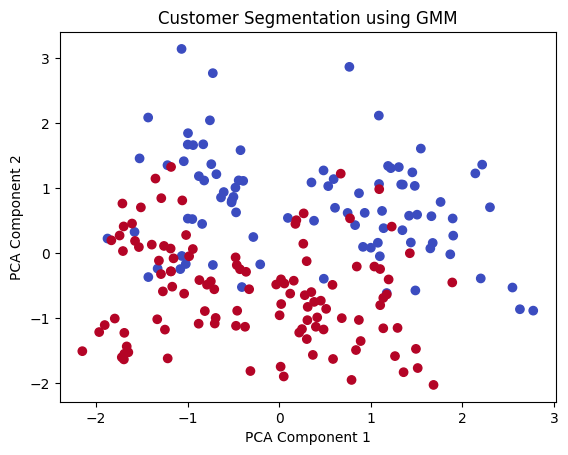

In [18]:
plt.scatter(pca_components[:,0], pca_components[:,1], c=customer_segments, cmap='coolwarm')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation using GMM")
plt.show()